In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [22]:
df = boston.frame

In [23]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
x = df.drop("MEDV", axis = 1)

In [26]:
y = df["MEDV"].astype(float)

In [27]:
print(x.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [28]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [30]:
x_train.shape

(404, 13)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object),
 'n_features_in_': 13,
 'coef_': array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]),
 'rank_': 13,
 'singular_': array([3.48249449e+03, 1.58913803e+03, 5.82914380e+02, 3.24578125e+02,
        1.46241745e+02, 1.09790632e+02, 8.12902049e+01, 6.12128044e+01,
        3.72716709e+01, 2.14659310e+01, 1.01878833e+01, 4.96923719e+00,
        1.11727491e+00]),
 'intercept_': np.float64(30.24675099392349)}

In [42]:
print("\nIntercept (b0):", model.intercept_)

# Coefficients (weights of each feature)
coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_
})


Intercept (b0): 30.24675099392349


In [43]:
coefficients

,Feature,Coefficient
0,CRIM,-0.113056
1,ZN,0.030110
2,INDUS,0.040381
3,CHAS,2.784438
4,NOX,-17.202633
5,RM,4.438835
6,AGE,-0.006296
7,DIS,-1.447865
8,RAD,0.262430
9,TAX,-0.010647


In [47]:
print(x_train.dtypes)


CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object


In [49]:
x_train = x_train.copy()
x_test = x_test.copy()

x_train["CHAS"] = x_train["CHAS"].cat.codes
x_test["CHAS"] = x_test["CHAS"].cat.codes

x_train["RAD"] = x_train["RAD"].cat.codes
x_test["RAD"] = x_test["RAD"].cat.codes

In [50]:
y_pred = model.predict(x_test)

In [51]:
print(y_pred[:5])

[28.99672362 36.02556534 14.81694405 25.03197915 12.99642573]


In [52]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Model Evaluation:
Mean Squared Error (MSE): 38.746298332119196
R2 Score: 0.47164462731437573


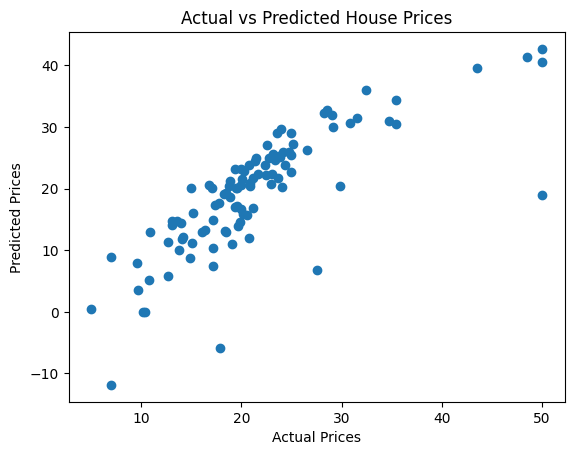

In [53]:
plt.figure()
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

plt.show()